In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape #dataset contains 158 rows and 12 column

(158, 12)

In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
#checking null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

In [8]:
#checking for duplicated value
df.duplicated().sum()

0

In [9]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [10]:
"""In the dataset has 3 types of data (int,float,object) with memory usage"""

'In the dataset has 3 types of data (int,float,object) with memory usage'

In [ ]:
#checking statistical summary of numerical columns

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("numerical columns: ",num_col)
print("\n")

Categorical columns:  ['Country', 'Region']


numerical columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']




In [13]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [14]:
#checking statistical summary of dataset
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


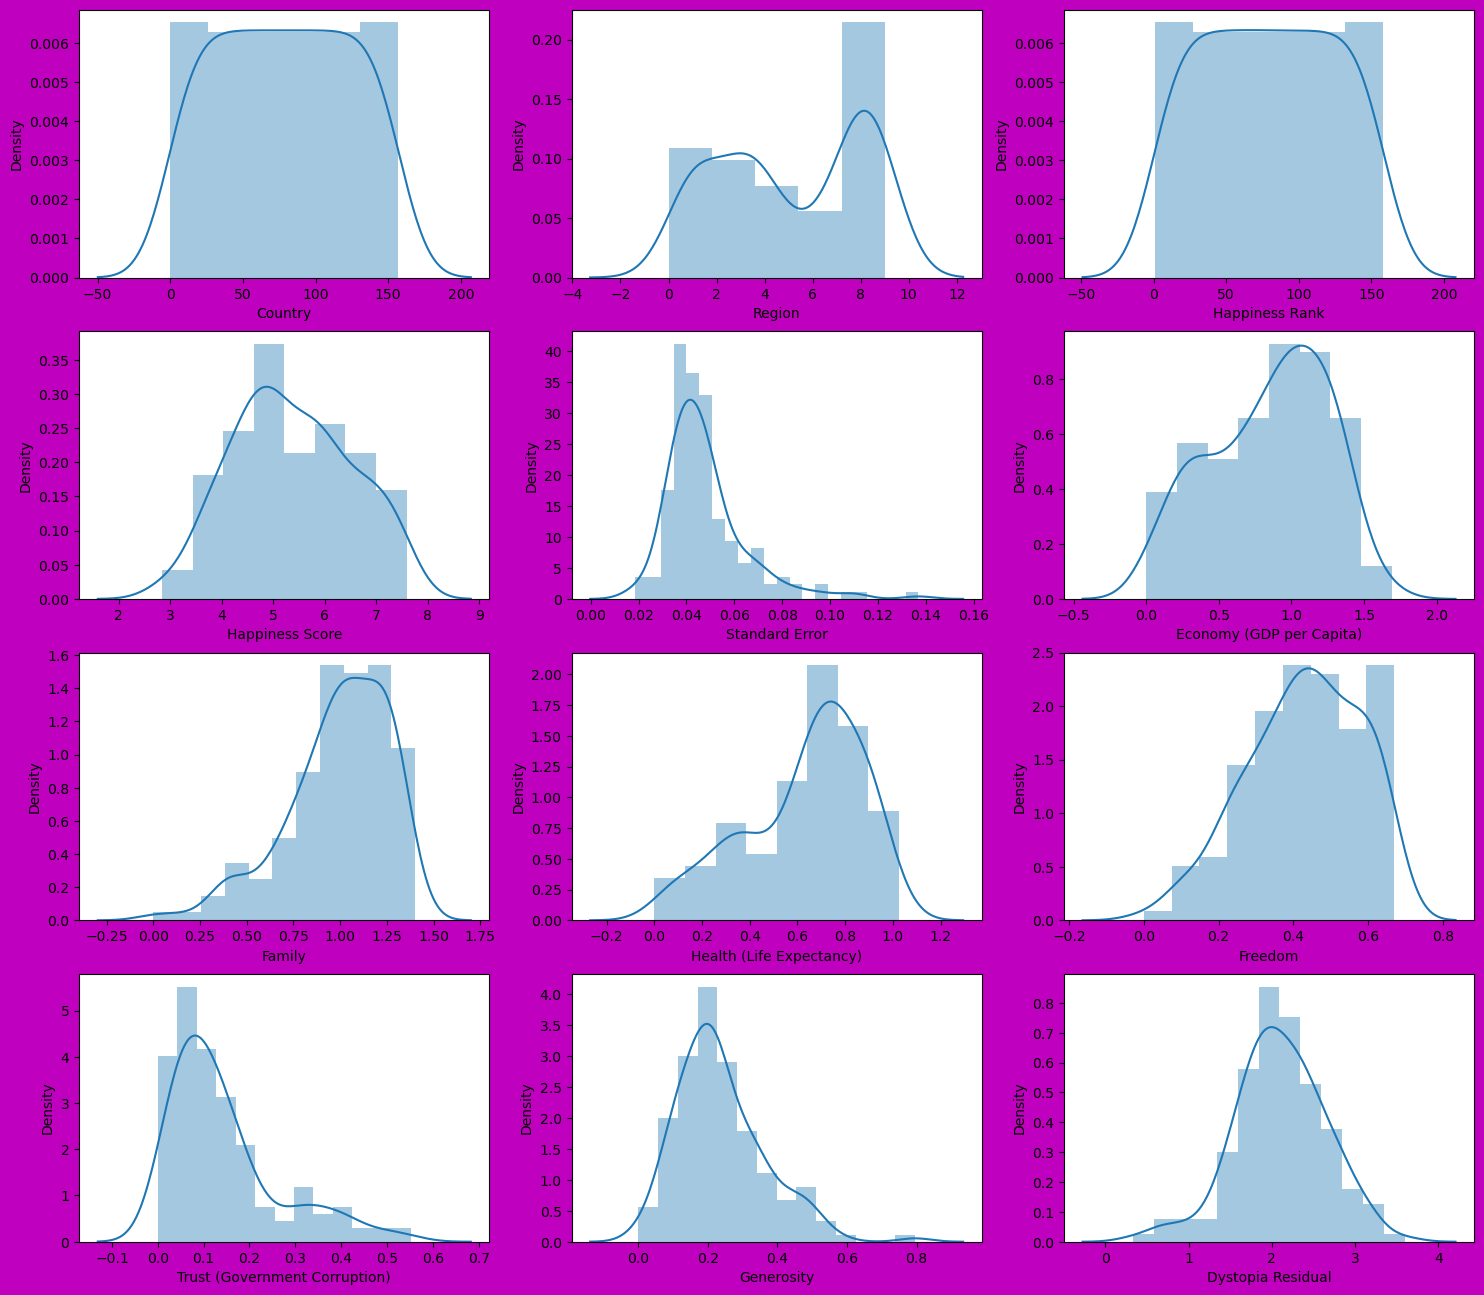

In [15]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor="m")
p=1
for col in df:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

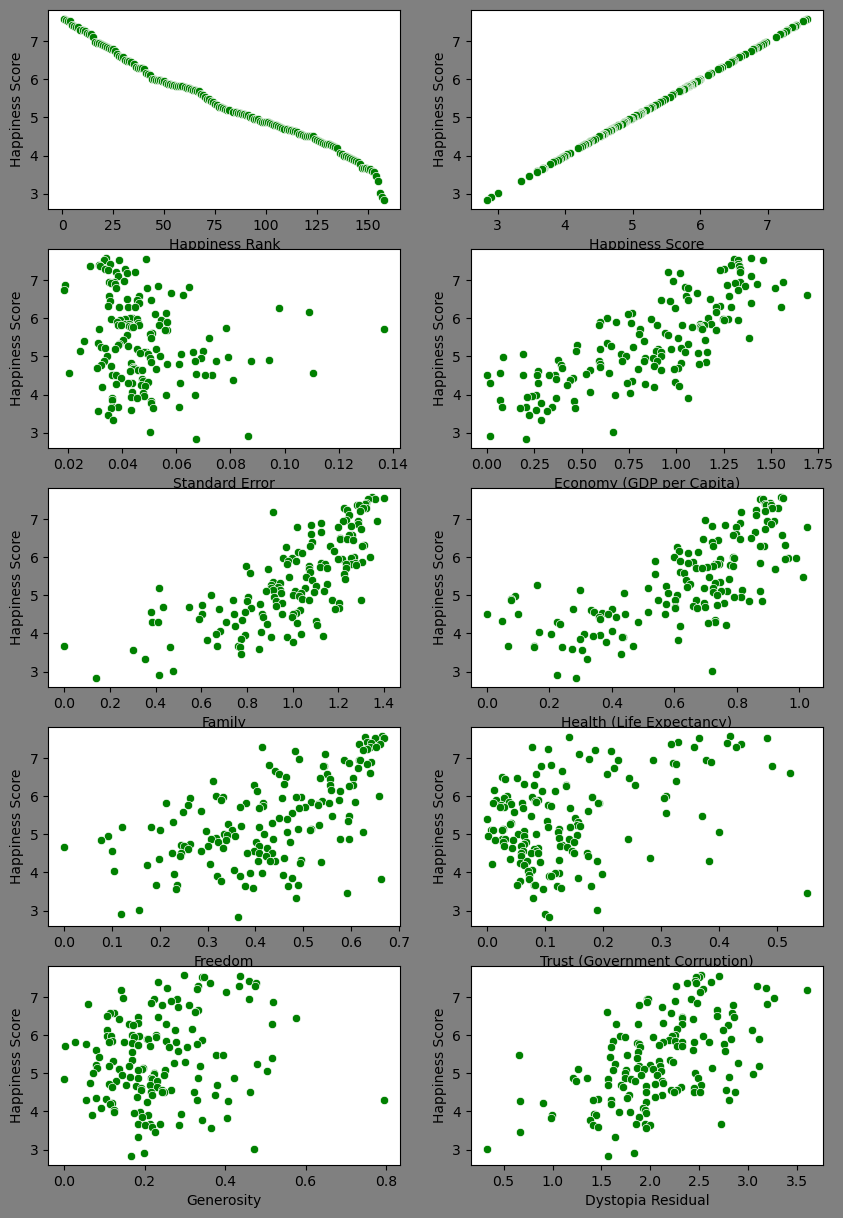

In [17]:
#lets visualize scatterplot for how one variable related to target variable
plt.figure(figsize=(10,15),facecolor='grey')
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.scatterplot(x=i,y='Happiness Score',data=df,color='g')
        plt.xlabel(i)
        plt.ylabel("Happiness Score")
    p+=1
plt.show()

In [18]:
"""From the above observation we can see the Economy,Family,Health,Freedom increases the Happiness score is also increases 
This are important features for prediction.
Happiness score is our target variable."""

'From the above observation we can see the Economy,Family,Health,Freedom increases the Happiness score is also increases \nThis are important features for prediction.\nHappiness score is our target variable.'

In [19]:
#For outliers
df_feature=df.drop('Happiness Score',axis=1)

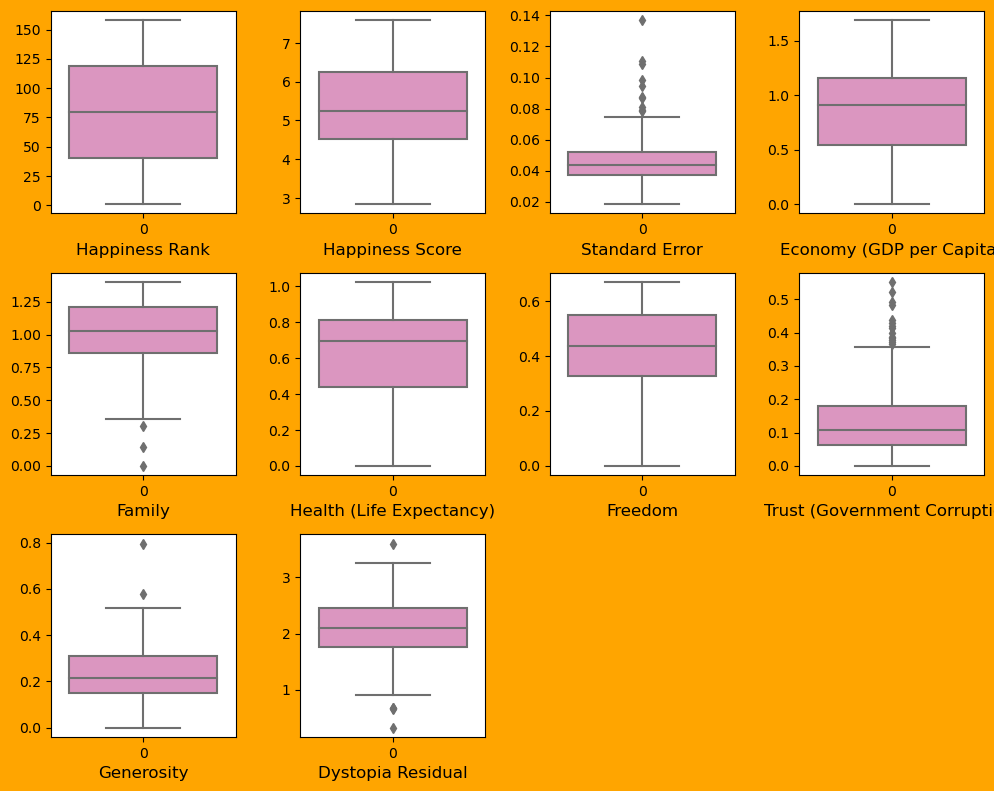

In [22]:
#cheking the outliers using boxplot
plt.figure(figsize=(10,8),facecolor='orange')
plotnumber=1
for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [23]:
"""Here, we can see the outliers present in Standard Error,Family,Trust,Generosity,Dystopia Residual.
so,removing outliers using ZScore."""

'Here, we can see the outliers present in Standard Error,Family,Trust,Generosity,Dystopia Residual.\nso,removing outliers using ZScore.'

In [24]:
from scipy.stats import zscore
z_score=zscore(df[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [25]:
#after removing outliers
df.shape

(149, 12)

In [26]:
"""After removing the outliers dataset contains 149 rows and 12 columns"""

'After removing the outliers dataset contains 149 rows and 12 columns'

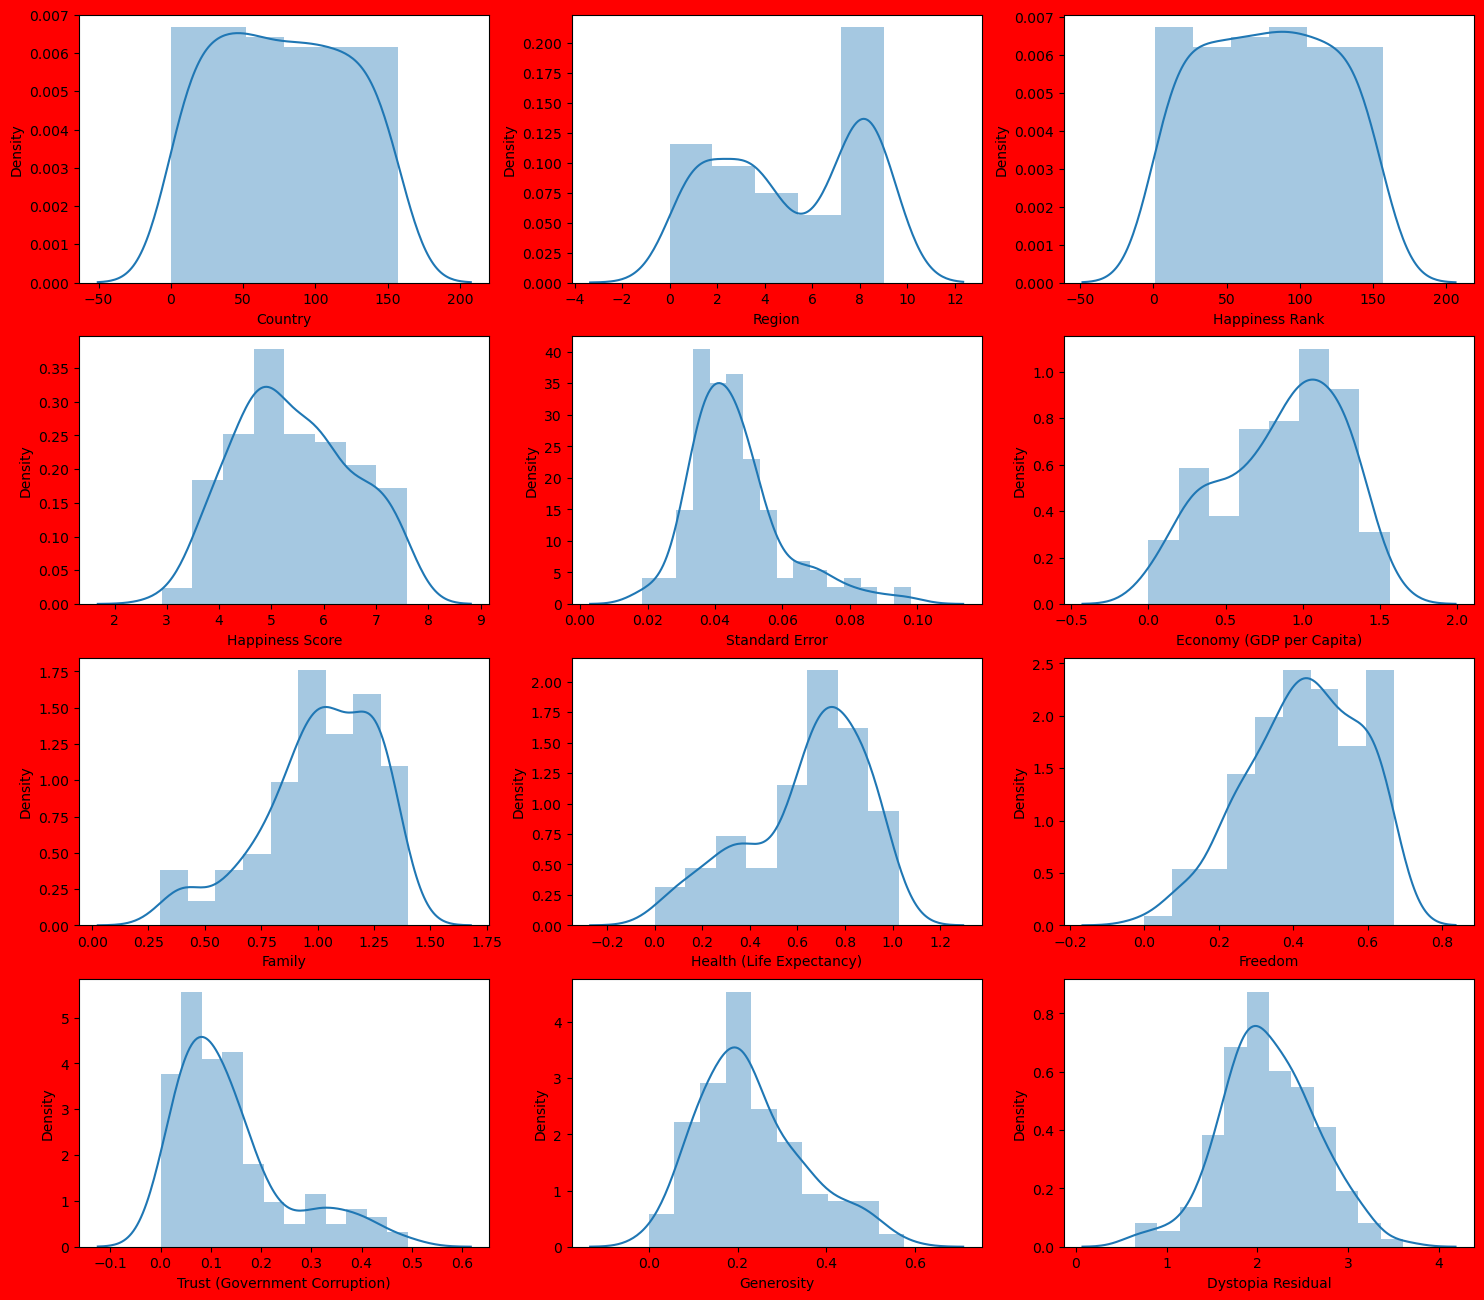

In [28]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='red')
p=1
for col in df:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [29]:
"""after the removing outliers data looks much better.
Now, checking the correlation between variables"""

'after the removing outliers data looks much better.\nNow, checking the correlation between variables'

In [30]:
#checking the correlation between features and target
cor=df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.007739,-0.125380,0.120109,0.003898,0.039300,0.202403,0.036875,0.091495,0.062379,0.096685,0.048980
Region,0.007739,1.000000,0.184520,-0.145850,-0.013860,-0.224928,-0.127749,-0.334531,0.101335,0.167550,0.305791,-0.059494
Happiness Rank,-0.125380,0.184520,1.000000,-0.992921,0.212085,-0.773651,-0.720359,-0.736758,-0.571089,-0.445743,-0.225626,-0.526680
Happiness Score,0.120109,-0.145850,-0.992921,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,0.003898,-0.013860,0.212085,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.039300,-0.224928,-0.773651,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.202403,-0.127749,-0.720359,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),0.036875,-0.334531,-0.736758,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.091495,0.101335,-0.571089,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.062379,0.167550,-0.445743,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080


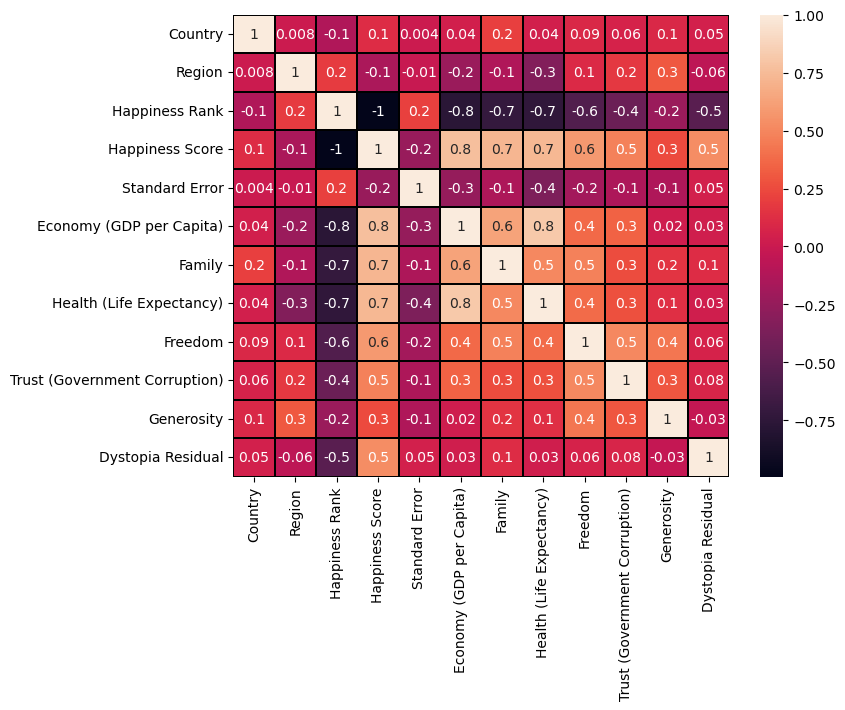

In [31]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [32]:
"""From the above observation we can say that the Economy,Family, Health has strong positive correlation with target variable
i.e.Happiness Score.
and the negative correlation with standard error,happiness rank,region.
Dystopia Residual,Trust,Freedom has the moderate correlation with Happiness score."""

'From the above observation we can say that the Economy,Family, Health has strong positive correlation with target variable\ni.e.Happiness Score.\nand the negative correlation with standard error,happiness rank,region.\nDystopia Residual,Trust,Freedom has the moderate correlation with Happiness score.'

In [33]:
cor['Happiness Score'].sort_values(ascending = False)
#We can observe the positive and negative correlated features with the target

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Health (Life Expectancy)         0.729191
Family                           0.720868
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.477692
Generosity                       0.250903
Country                          0.120109
Region                          -0.145850
Standard Error                  -0.230252
Happiness Rank                  -0.992921
Name: Happiness Score, dtype: float64

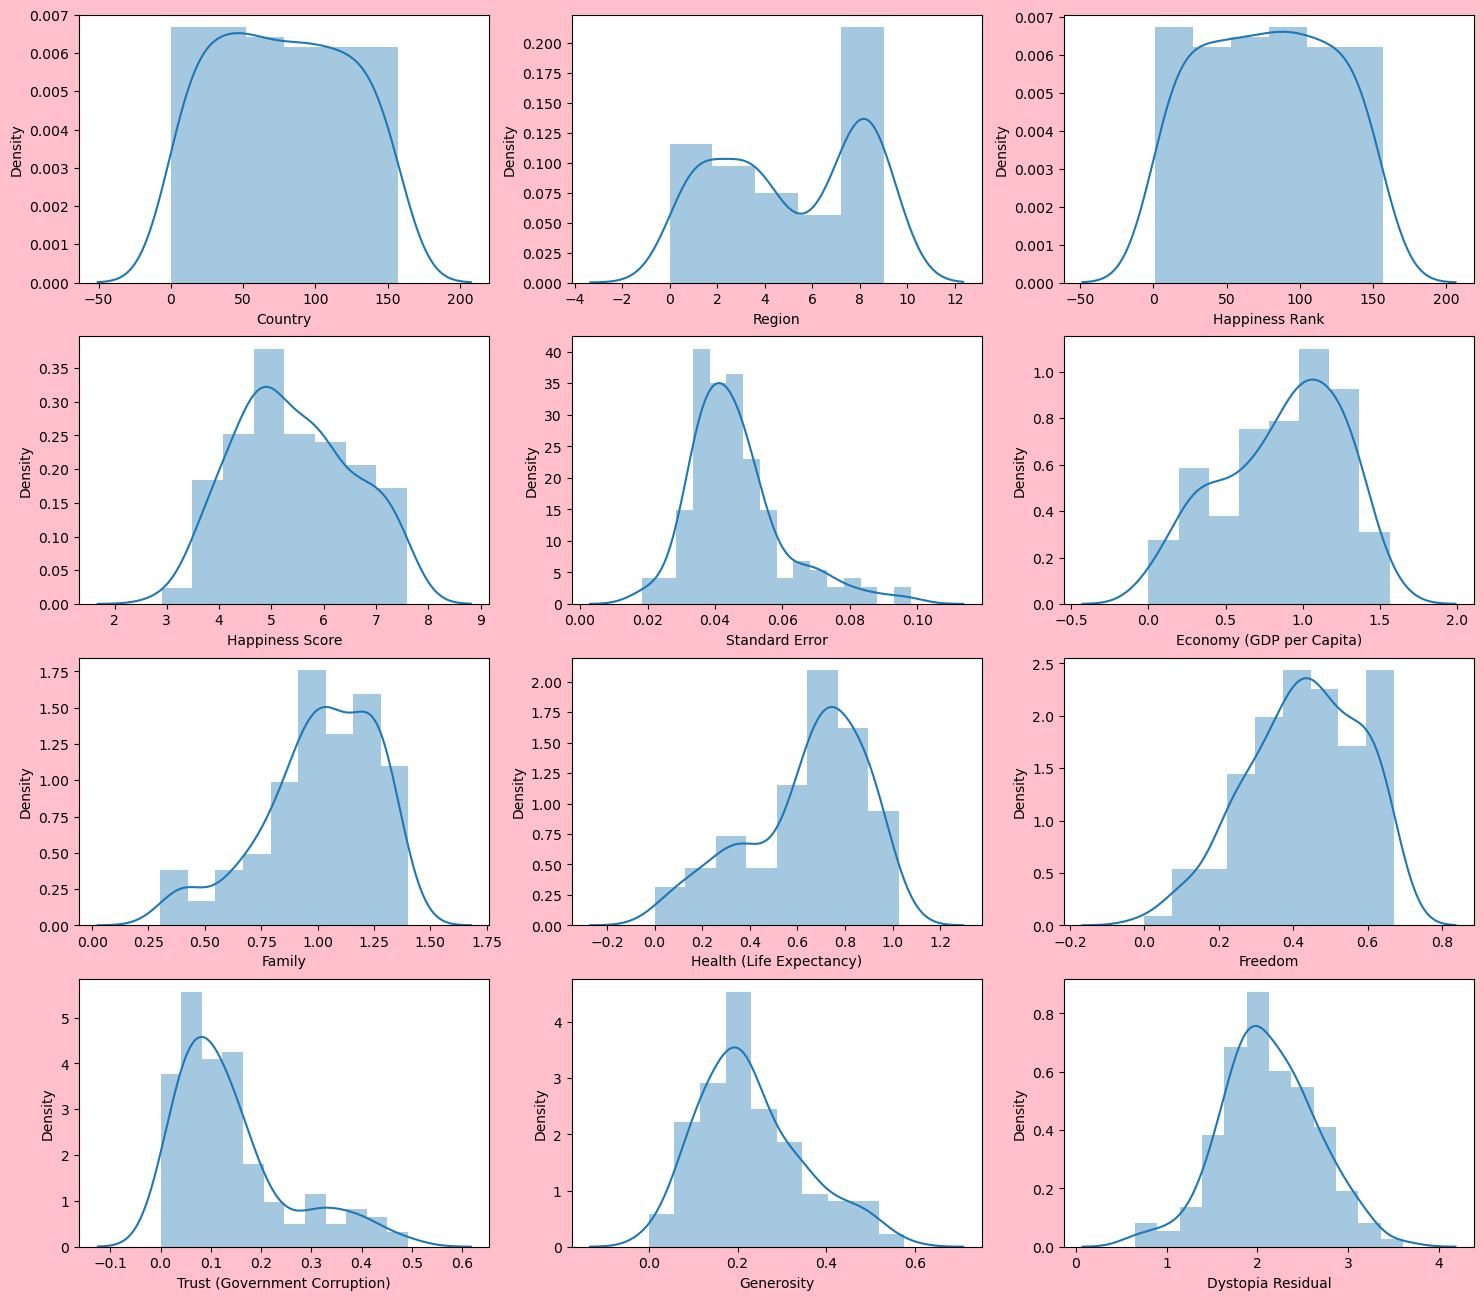

In [34]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='pink')
p=1
for col in df:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [35]:
"""from above observation we can say that the some skewness is present in Standard error,Trust,Generosity. Remaining all 
columns data looks almost normally distributed. Using cube root method we can remove the skewness. """

'from above observation we can say that the some skewness is present in Standard error,Trust,Generosity. Remaining all \ncolumns data looks almost normally distributed. Using cube root method we can remove the skewness. '

In [36]:
#checking skewness
df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [37]:
df['Standard Error']=np.cbrt(df['Standard Error'])
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])
df['Generosity']=np.cbrt(df['Generosity'])

In [38]:
#again checking skewness
df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

In [39]:
#separating features and label
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]

In [40]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-1.713905,-0.911097,1.381916,1.357879,1.235390,1.583704,1.886835,0.620101,0.756876
1,-0.417415,1.296837,-1.691535,0.289534,1.138324,1.567882,1.261541,1.338953,0.279412,1.374255,1.109300
2,-0.877145,1.296837,-1.669166,-0.988343,1.198220,1.401974,0.962900,1.476027,2.142033,0.883029,0.708507
3,0.611504,1.296837,-1.646796,-0.496623,1.543526,1.283947,1.006023,1.611371,1.646273,0.914382,0.657485
4,-1.161739,-0.026647,-1.624427,-0.781797,1.200315,1.250726,1.089333,1.366887,1.477326,1.476816,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,1.641542,0.473095,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.044953,-1.343100
145,-1.249307,0.965966,1.663911,-0.134003,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,0.078376,-1.252030
146,-1.687145,0.635095,1.686281,-1.223140,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.013522,-0.322135
147,-1.402550,0.965966,1.731020,-0.690149,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.202346,-0.930702


In [41]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.067692,Country
1,1.419494,Region
2,76.809308,Happiness Rank
3,1.196152,Standard Error
4,13.270037,Economy (GDP per Capita)
5,6.106953,Family
6,8.793782,Health (Life Expectancy)
7,3.485610,Freedom
8,1.768809,Trust (Government Corruption)
9,2.081318,Generosity


In [42]:
"""By checking VIF values we can find the features causing multicollinarity problem.here we can
find the feature Happiness Rank,Economy and Dystopia Residual have VIF value > 10 which means they have high correlation
with other features.we will drop one of the col first,if the same issue exist then we will try to
remove the col having  high VIF """

'By checking VIF values we can find the features causing multicollinarity problem.here we can\nfind the feature Happiness Rank,Economy and Dystopia Residual have VIF value > 10 which means they have high correlation\nwith other features.we will drop one of the col first,if the same issue exist then we will try to\nremove the col having  high VIF '

In [43]:
#Dropping Happiness Rank column
x.drop("Happiness Rank",axis=1,inplace=True)

In [44]:
#again checking value to confirm wether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.061751,Country
1,1.389781,Region
2,1.188344,Standard Error
3,4.224776,Economy (GDP per Capita)
4,2.037370,Family
5,3.879275,Health (Life Expectancy)
6,1.972603,Freedom
7,1.426325,Trust (Government Corruption)
8,1.439129,Generosity
9,1.040347,Dystopia Residual


In [45]:
"""so,we have solved multicollinearity issue.we can now move ahead for model building"""

'so,we have solved multicollinearity issue.we can now move ahead for model building'

In [47]:
............MODELLING.........

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [49]:
#finding best random state

maxAccu=0
maxRs=0
for i in range(1,160):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"on Random state",maxRs)

Maximum r2 score is  0.9985864046050724 on Random state 153


In [50]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRs)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [52]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print('R2_score: ',r2_score(y_test,pred_LR))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ',np.sqrt(mean_absolute_error(y_test,pred_LR)))

R2_score:  0.9985864046050724
R2_score on training data:  99.61545483595732
Mean Absolute Error:  0.03569579757737306
Mean Squared Error:  0.0018110020120771517
Root Mean Squared Error:  0.18893331516006662


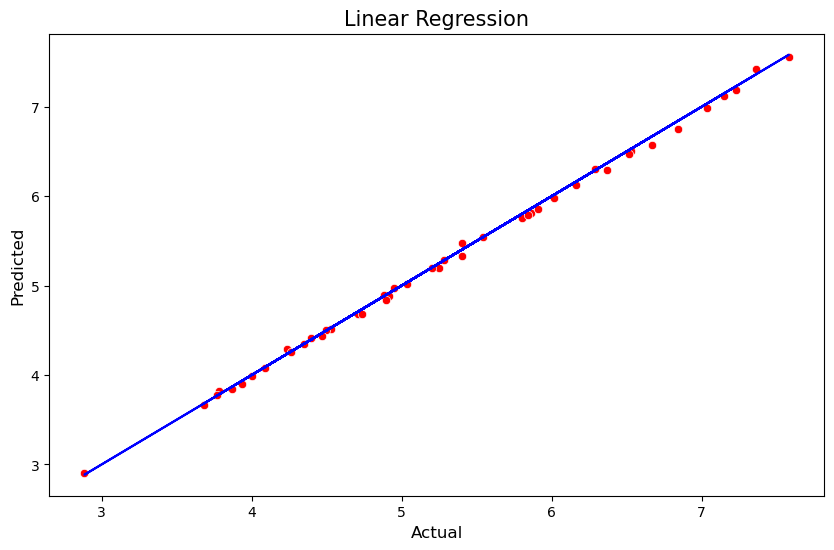

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title("Linear Regression",fontsize=15)
plt.show()

In [54]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_RFR)))

R2_score: 0.8914629686273077
R2_score on training data: 98.68504296772326
Mean Absolute Error: 0.270161333333333
Mean Squared Error: 0.13905024231555518
Root Mean Squared Error: 0.5197704621593391


In [55]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_GBR)))

R2_score: 0.9045582035353222
R2_score on training data: 99.96224210292391
Mean Absolute Error: 0.2414732667795989
Mean Squared Error: 0.12227352045289444
Root Mean Squared Error: 0.4913992946470303


In [57]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)

print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_rd)))

R2_score: 0.998647121709379
R2_score on training data: 99.61158041913053
Mean Absolute Error: 0.034630529719563326
Mean Squared Error: 0.0017332153989761169
Root Mean Squared Error: 0.18609279867733552


In [58]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)

print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_dtr)))

R2_score: 0.6668763075586281
R2_score on training data: 100.0
Mean Absolute Error: 0.5161111111111112
Mean Squared Error: 0.4267753555555556
Root Mean Squared Error: 0.7184087354084102


In [59]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)

print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_svr)))

R2_score: 0.912110871409213
R2_score on training data: 99.22841606726675
Mean Absolute Error: 0.19367794499777113
Mean Squared Error: 0.11259755746854432
Root Mean Squared Error: 0.44008856494775134


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.90644139 0.94560533 0.84863756 0.64361401 0.98545049]
0.8659497564118993
Difference between R2 score and cross validation score is : 13.263664819317311


In [62]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[-9.19998512 -0.86107392 -1.21109241 -2.71345244 -6.57172064]
-4.111464907220315
Difference between R2 score and cross validation score is : 500.29278758476227


In [63]:
score2=cross_val_score(GBR,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_GBR)-score2.mean())*100)

[-4.79645267 -0.10287433 -1.12810455 -2.44984491 -4.47930194]
-2.591315680214218
Difference between R2 score and cross validation score is : 349.587388374954


In [64]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd)-score4.mean())*100)

[0.87449722 0.94729312 0.84955946 0.6467127  0.98050612]
0.8597137236002569
Difference between R2 score and cross validation score is : 13.89333981091221


In [65]:
score5=cross_val_score(dtr,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_dtr)-score5.mean())*100)

[ -9.04110039 -13.39626582  -6.95514775 -14.16087319  -5.95892382]
-9.902462195501606
Difference between R2 score and cross validation score is : 1056.9338503060233


In [66]:
score6=cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_svr)-score6.mean())*100)

[-10.0583308    0.14066098   0.80877684  -1.19454064  -5.52571723]
-3.1658301689479034
Difference between R2 score and cross validation score is : 407.7941040357116


In [69]:
             """RIDGE REGRESSION IS OUR BEST MODEL......"""

'RIDGE REGRESSION IS OUR BEST MODEL......'

In [70]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
param={'alpha':[1.0,0.05,0.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
      'positive':[False,True],
      'random_state':range(1,30),
      
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': range(1, 30),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [71]:
gscv.best_params_

{'alpha': 0.4,
 'fit_intercept': True,
 'positive': False,
 'random_state': 24,
 'solver': 'saga'}

In [72]:
model=Ridge(alpha=0.4,fit_intercept=True,positive=False,random_state=24,solver='saga')

In [73]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred)))

R2_score: 0.9986216676782504
Mean Absolute Error: 0.035126834569890894
Mean Squared Error: 0.0017658253676805132
Root Mean Squared Error: 0.18742154243813836


In [74]:
import joblib

In [75]:
import pickle
filename='world happiness.pkl'
pickle.dump(model,open(filename,'wb'))#saved model

In [76]:
loaded_model=pickle.load(open('world happiness.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.86216676782504


In [77]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,4.71237,6.527276,5.861249,3.789707,5.803002,4.0076,7.357323,3.939969,5.54313,4.398159,...,4.094138,5.195678,2.888823,4.494258,5.844501,6.287123,4.894049,4.945938,4.469465,3.774344
Original,4.68100,6.505000,5.813000,3.819000,5.754000,3.9890,7.427000,3.896000,5.54800,4.419000,...,4.077000,5.194000,2.905000,4.507000,5.791000,6.302000,4.839000,4.971000,4.436000,3.781000
